This analysis is borrowed from Josh Starmer
- https://www.youtube.com/watch?v=Lsue2gEM9D0
- https://github.com/StatQuest/pca_demo/blob/master/pca_demo.py

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import random as rd

In [4]:
from sklearn.decomposition import PCA

In [5]:
from sklearn import preprocessing

In [6]:
import pylab

In [7]:
genes = ['gene' + str(i) for i in range(1, 101)]

In [8]:
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]

In [9]:
data = pd.DataFrame(columns=[*wt, *ko], index=genes)
data

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
gene96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)

In [11]:
data

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,666,740,736,688,680,840,854,830,813,879
gene2,407,391,369,381,379,448,470,443,406,439
gene3,312,329,294,318,284,918,931,930,931,910
gene4,185,215,231,220,185,557,620,576,596,562
gene5,303,334,356,314,298,130,138,106,123,126
...,...,...,...,...,...,...,...,...,...,...
gene96,177,170,201,193,178,615,670,650,624,665
gene97,697,675,698,673,657,952,901,933,992,938
gene98,873,814,860,815,865,271,238,262,251,229
gene99,705,771,783,745,761,135,175,174,176,164


In [12]:
scaled_data = preprocessing.scale(data.T)
scaled_data

array([[-1.41301289, -0.19229046, -0.98420323, -1.11134519,  0.80487208,
        -1.00393374,  0.99032721, -0.89991076,  1.2612378 ,  0.50135374,
         1.20156764,  0.89897816, -1.04511654,  0.81952721, -1.02984249,
        -0.981308  ,  0.15649156, -0.98519543,  0.80015528, -0.86342061,
         1.08997858, -0.86130456, -0.99520539,  0.8277788 , -0.98235925,
         0.89668199,  1.0496764 ,  0.81655956, -1.02294689, -1.0289762 ,
         0.98419093, -0.99033845,  1.06546098, -0.62630808,  1.02102606,
         0.77175372,  0.21235957, -1.12790149,  0.99113256,  1.1053415 ,
        -1.11113053,  0.87244067,  1.09086858,  0.76322857, -0.94607158,
        -0.78833819,  1.00362278,  0.94965712, -1.11005923, -0.97844041,
         1.1148045 ,  0.54315817, -0.84234072, -0.99382083,  1.41082891,
        -0.91513773, -1.02505427, -0.97701714, -0.98950531, -0.80742025,
         0.94009888, -0.8745048 ,  0.70153421,  1.18819119,  1.01202134,
        -0.90724726,  1.01189381,  0.96943874, -0.9

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.values.T)
scaled_data

array([[-1.41301289, -0.19229046, -0.98420323, -1.11134519,  0.80487208,
        -1.00393374,  0.99032721, -0.89991076,  1.2612378 ,  0.50135374,
         1.20156764,  0.89897816, -1.04511654,  0.81952721, -1.02984249,
        -0.981308  ,  0.15649156, -0.98519543,  0.80015528, -0.86342061,
         1.08997858, -0.86130456, -0.99520539,  0.8277788 , -0.98235925,
         0.89668199,  1.0496764 ,  0.81655956, -1.02294689, -1.0289762 ,
         0.98419093, -0.99033845,  1.06546098, -0.62630808,  1.02102606,
         0.77175372,  0.21235957, -1.12790149,  0.99113256,  1.1053415 ,
        -1.11113053,  0.87244067,  1.09086858,  0.76322857, -0.94607158,
        -0.78833819,  1.00362278,  0.94965712, -1.11005923, -0.97844041,
         1.1148045 ,  0.54315817, -0.84234072, -0.99382083,  1.41082891,
        -0.91513773, -1.02505427, -0.97701714, -0.98950531, -0.80742025,
         0.94009888, -0.8745048 ,  0.70153421,  1.18819119,  1.01202134,
        -0.90724726,  1.01189381,  0.96943874, -0.9

In [16]:
pca = PCA()

In [17]:
pca.fit(scaled_data)

PCA()

In [18]:
pca_data = pca.transform(scaled_data)

In [19]:
pca.explained_variance_ratio_

array([9.19531450e-01, 2.13310834e-02, 1.63970913e-02, 1.39646930e-02,
       9.95468912e-03, 6.41289933e-03, 5.75893214e-03, 3.94953081e-03,
       2.69963110e-03, 5.18885048e-33])

In [20]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

Text(0.5, 1.0, 'Scree Plot')

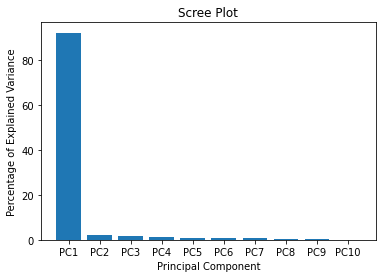

In [21]:
pylab.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
pylab.ylabel('Percentage of Explained Variance')
pylab.xlabel('Principal Component')
pylab.title('Scree Plot')

In [22]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

In [23]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,9.275562,1.611989,0.038621,-1.648470,-1.197404,-0.151730,-0.937034,0.777600,0.314975,8.197541e-16
wt2,9.583707,0.946153,2.923761,1.388611,0.166882,-0.356313,-0.104234,-0.430637,-0.271462,1.236023e-15
wt3,9.402405,0.546270,-0.959329,-1.177794,2.113804,0.694813,-0.128999,-0.649442,0.040068,9.762371e-16
wt4,9.863750,-1.661291,-1.169324,1.670187,-1.098333,0.770136,-0.030697,-0.328962,0.615723,1.598917e-15
wt5,9.813523,-1.367777,-0.812146,-0.291288,0.028326,-0.939574,1.173790,0.638211,-0.699311,8.375028e-16
ko1,-9.551691,-0.636570,0.761446,0.482771,1.307453,-0.343625,0.238533,0.909872,0.929611,-2.328841e-17
ko2,-9.513604,-1.763681,-0.287075,-0.562207,-0.168671,-1.271940,-1.108148,-0.782648,-0.111773,2.854464e-16
ko3,-9.679765,-1.318907,0.934419,-0.437892,-0.218912,1.593372,-0.310208,0.438873,-0.703617,-5.322752e-16
ko4,-9.594646,1.109776,0.366866,-1.152549,-1.012728,0.123851,1.429673,-0.747418,0.316191,-3.737982e-16
ko5,-9.599240,2.534038,-1.797239,1.728631,0.079584,-0.118989,-0.222674,0.174551,-0.430405,-1.380194e-15


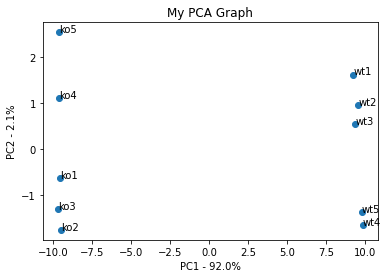

In [24]:
pylab.scatter(pca_df['PC1'], pca_df['PC2'])
pylab.title('My PCA Graph')
pylab.xlabel('PC1 - {0}%'.format(per_var[0]))
pylab.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    pylab.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

In [25]:
loading_scores = pd.Series(pca.components_[0], index=genes)

In [26]:
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

In [27]:
top_10_genes = sorted_loading_scores[0:10].index.values

In [28]:
print(loading_scores[top_10_genes])

gene48    0.104244
gene23   -0.104227
gene57   -0.104223
gene68    0.104192
gene31    0.104187
gene3    -0.104181
gene35    0.104177
gene15   -0.104173
gene25   -0.104172
gene72   -0.104162
dtype: float64
